In [103]:
#Import Packages
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
import xgboost as xgb


import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from statsmodels.api import Logit
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

import seaborn as sns

### Import data and EDA

In [104]:
#Import data
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [105]:
#count missing value
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

Text(0.5, 1.0, 'Avg Conversion rate per country')

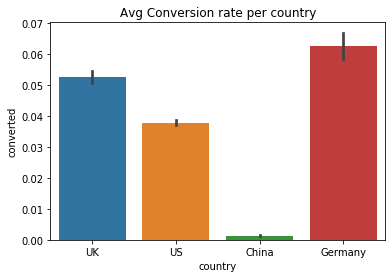

In [109]:
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()
sns.barplot(x='country', y='converted', data=data).set_title('Avg Conversion rate per country')

Text(0.5, 1.0, 'CMD of Conversion rate')

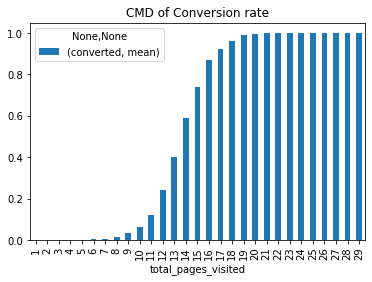

In [112]:
data[['total_pages_visited', 'converted']].groupby(['total_pages_visited']).agg(['mean']).plot(kind="bar").set_title('CMD of Conversion rate')

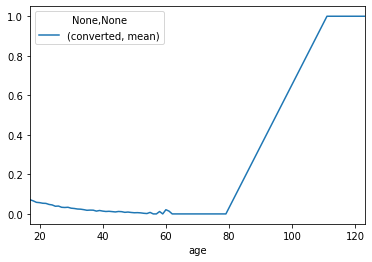

In [118]:
data[['age','converted']].groupby(['age']).agg(['mean']).plot()

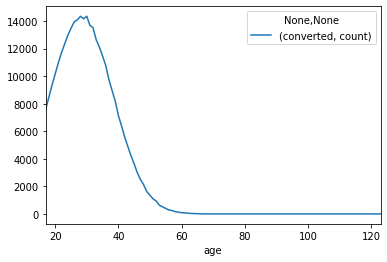

In [117]:
data[['age', 'converted']].groupby(['age']).agg(['count']).plot()

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


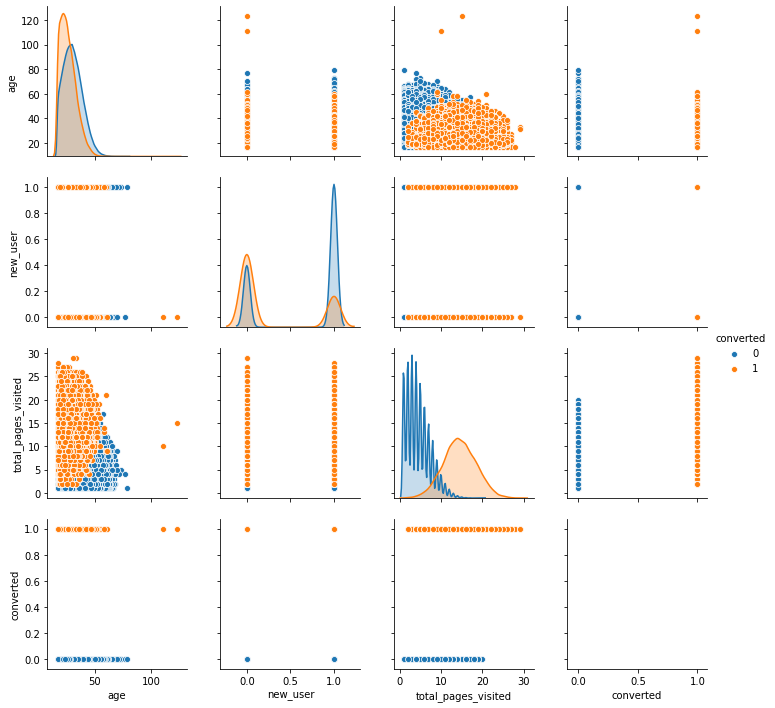

In [36]:
sns.pairplot(data,hue='converted')

### Model Build

In [66]:
#Dummy categorical data
data = pd.get_dummies(data)
data.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [74]:
#Transfer X and Y to numpy dataset
X = data.copy().drop('converted',axis = 1).to_numpy()
Y = data['converted'].copy().to_numpy()

In [76]:
# CV model
model = XGBClassifier()
kfold = KFold(n_splits=10, random_state=2020,shuffle = True)

In [96]:
#Run the Kflod CV and store the result into a list
acc_results = []
imp_results = []
average_precision = []
F1 = []
class_report = []
model = XGBClassifier()
# "Error_function" can be replaced by the error function of your analysis
for traincv, testcv in kfold.split(X):
        prediction = model.fit(X[[traincv]], Y[traincv]).predict(X[testcv])
        acc_results.append(accuracy_score(Y[testcv], prediction))
        average_precision.append(average_precision_score(Y[testcv], prediction))
        imp_results.append(model.feature_importances_.tolist())
        F1.append(f1_score(Y[testcv],prediction))
        class_report.append(classification_report(Y[testcv], prediction, target_names=['0','1']))
        
print("Accuracy results: " + str( np.array(acc_results).mean()))
print('Average Precision score:' +  str( np.array(average_precision).mean()))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


Accuracy results: 0.9860309930423783
Average Precision score:0.5942807038040407


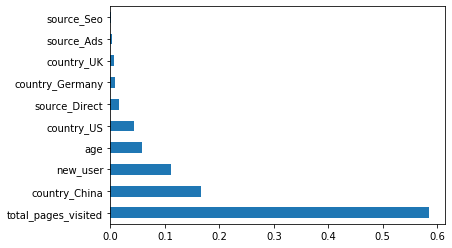

In [102]:
#Understand the importance of the metrics
features = data.drop("converted", axis=1).columns.values
pd.Series(model.feature_importances_, index=features).nlargest(12).plot(kind='barh')